In [2]:
from ipywidgets import interactive
import ipywidgets as widgets
from skimage import data, io, filters
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import random
styles = ["Archaic", "Hasmonean", "Herodian"]

letters = ['Alef', 'Bet', 'Gimel', 'Dalet', 'He', 'Waw', 'Zayin', 'Het', 
                   'Tet', 'Yod', 'Kaf', 'Kaf-final', 'Lamed', 'Mem', 'Mem-medial',
                   'Nun-medial', 'Nun-final', 'Samekh', 'Ayin', 'Pe', 'Pe-final',
                   'Tsadi-medial', 'Tsadi-final', 'Qof', 'Resh', 'Shin', 'Taw']


def sample_styles(num = 5, path = "../../style/", styles=["Archaic", "Hasmonean", "Herodian"]):
    nd_paths = np.empty(shape = (len(styles),len(letters),num), dtype = np.object)
    for i, s in enumerate(styles):
        for j, l in enumerate(letters):
            pattern = os.path.join(path, s, l, "*")
            img_paths = glob.glob(pattern)
            if len(img_paths) > num:
                img_paths = random.sample(img_paths, k = num)
            nd_paths[i,j,:len(img_paths)] = img_paths
    return nd_paths



In [101]:
import cv2
from skimage import img_as_uint, img_as_bool
def draw_examples(images, labels = False):
    horizontal_px = images.shape[0] * images.shape[2] * images.shape[4]
    vertical_px = images.shape[1] * images.shape[3]
    sidebyside = images.transpose([0,2,4,1,3]).reshape(horizontal_px, vertical_px).T
    return sidebyside

In [49]:
import skimage.transform
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
#from skimage.util import pad
def load_images(paths, size):
    images = np.ones(paths.shape + (size,size), dtype=np.bool)
    for index, path in np.ndenumerate(paths):
        if not path is None:
            img = io.imread(path)
            if len(img.shape) == 3:
                img = rgb2gray(img)
            #print(img.shape)
            # Make square
            square_size = np.max(img.shape)
            pad_dim = np.maximum(square_size - img.shape, 0)
            pad_before = np.floor(pad_dim / 2.0).astype(np.int)
            pad_after = np.ceil(pad_dim / 2.0).astype(np.int)
            pad_width = ((pad_before[0], pad_after[0]), (pad_before[1], pad_after[1]))
            img = np.pad(img, pad_width, constant_values = 255)
            
            img = skimage.transform.resize(img, (size,size), anti_aliasing=True)
            # Binarize
            img =  img > threshold_otsu(img)
            images[index] = img
    return images

In [115]:
from skimage.morphology import skeletonize, medial_axis
from skimage.util import invert, img_as_uint
styles = ["Archaic", "Hasmonean", "Herodian"]
size = 75
num = 3
paths = sample_styles(num, styles=styles)
images = load_images(paths, size)

distance = np.zeros_like(images, dtype = np.uint8)
skeleton = np.zeros_like(images)
for idx in np.ndindex(images.shape[:3]):
    #print(idx)
    skeleton[idx], distance[idx] = medial_axis(invert(images[idx]), return_distance = True)
sidebyside = draw_examples(images)
sidebyside_dist = draw_examples(distance)
sidebyside_skeleton = draw_examples(skeleton)
#io.imsave("sidebyside.png", img_as_uint(sidebyside))

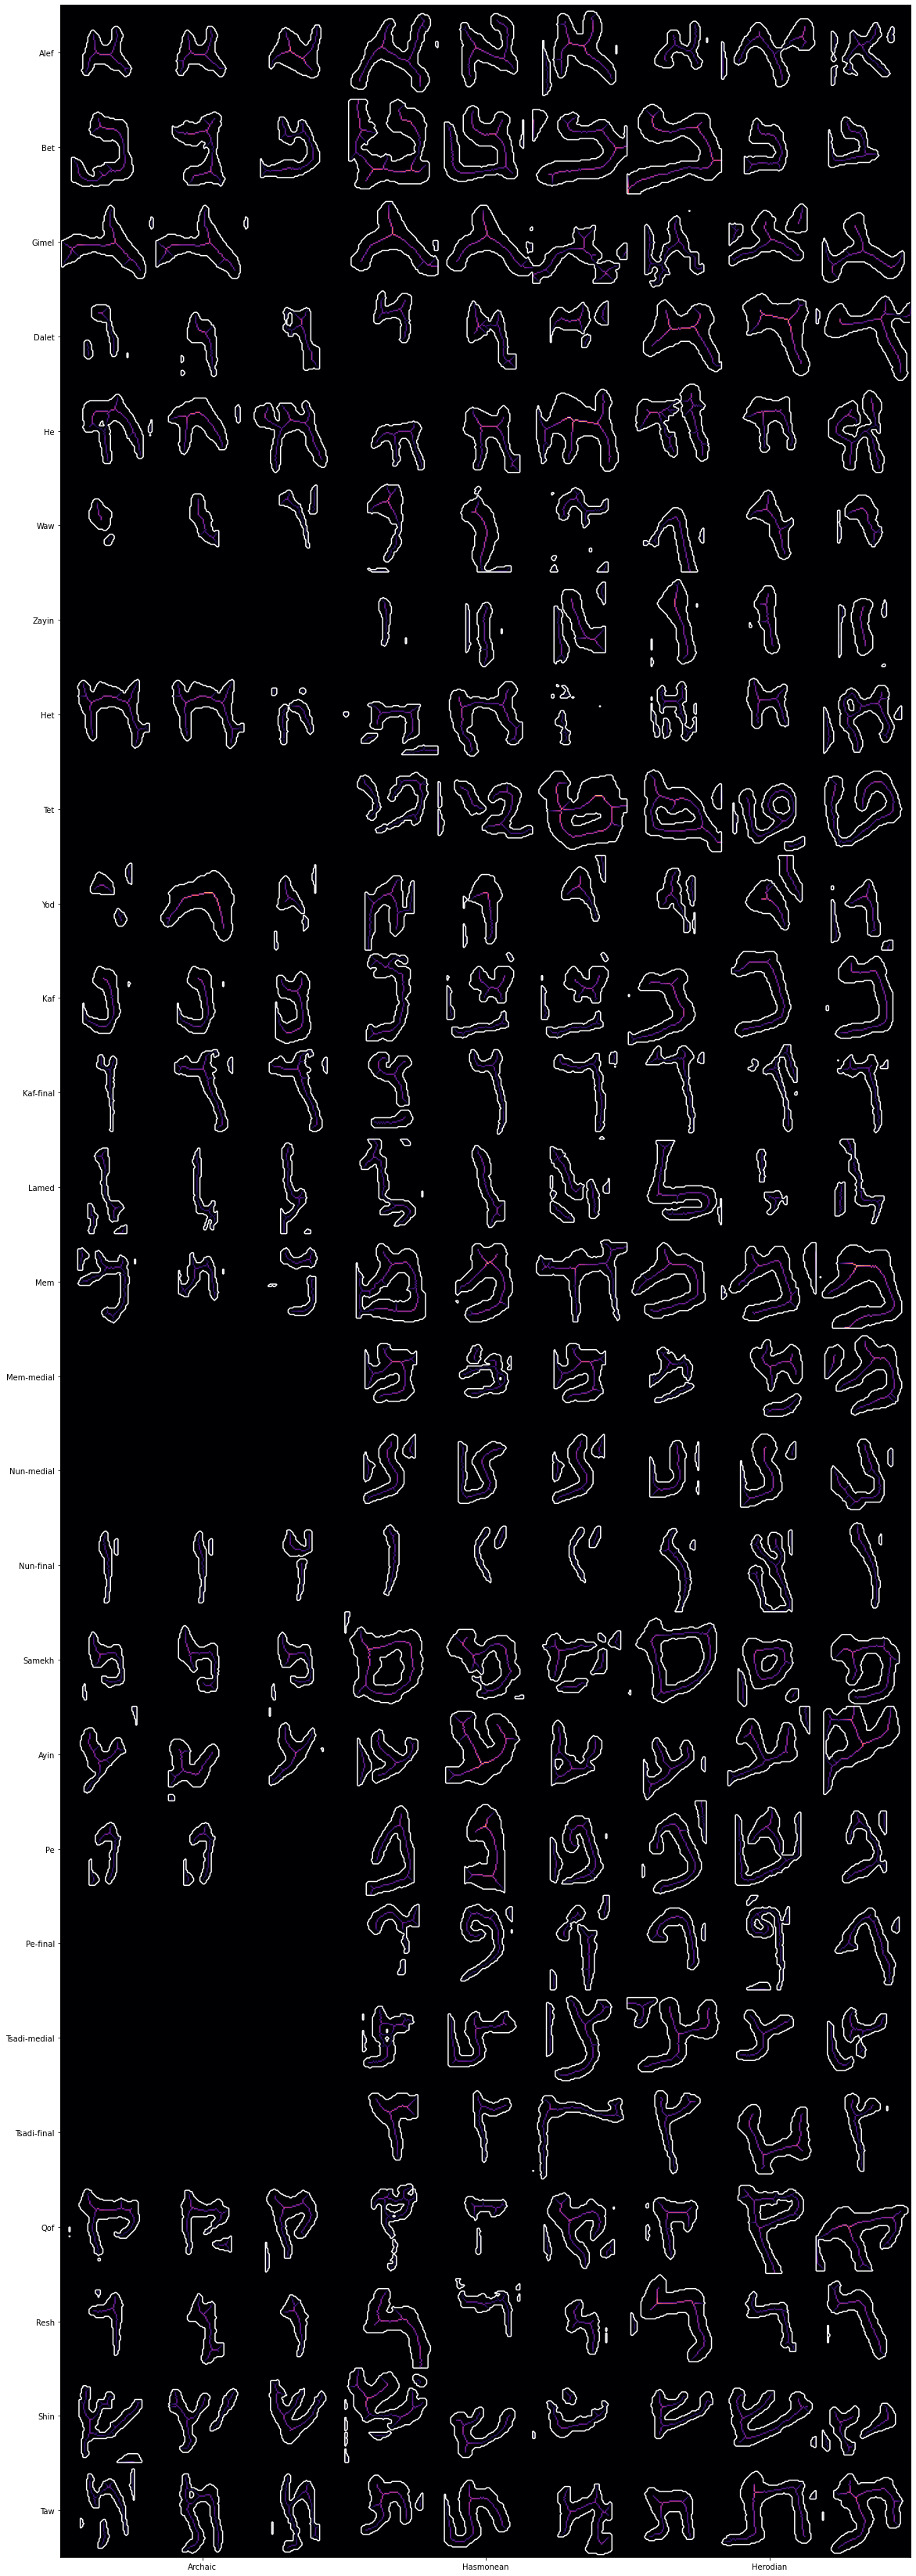

In [117]:
# Add labels to the image using matplotlib
f = plt.figure(figsize = (20, 60))
ax = f.gca()
ax.imshow(sidebyside_skeleton * sidebyside_dist, cmap='magma', aspect='equal')
ax.contour(sidebyside, [0.5], colors='w')
ax.set_yticks(np.arange(len(letters)) * size + size / 2)
ax.set_yticklabels(letters)
y_step = size * num 

ax.set_xticks(np.arange(len(styles)) * y_step + y_step / 2)
ax.set_xticklabels(styles)

# f.savefig("styles_medial_line.png")

In [121]:
size = 100
num = 5
styles=["monkbrill"]
paths = sample_styles(num, path="../../", styles=styles)
images = load_images(paths, size)
sidebyside = draw_examples(images)

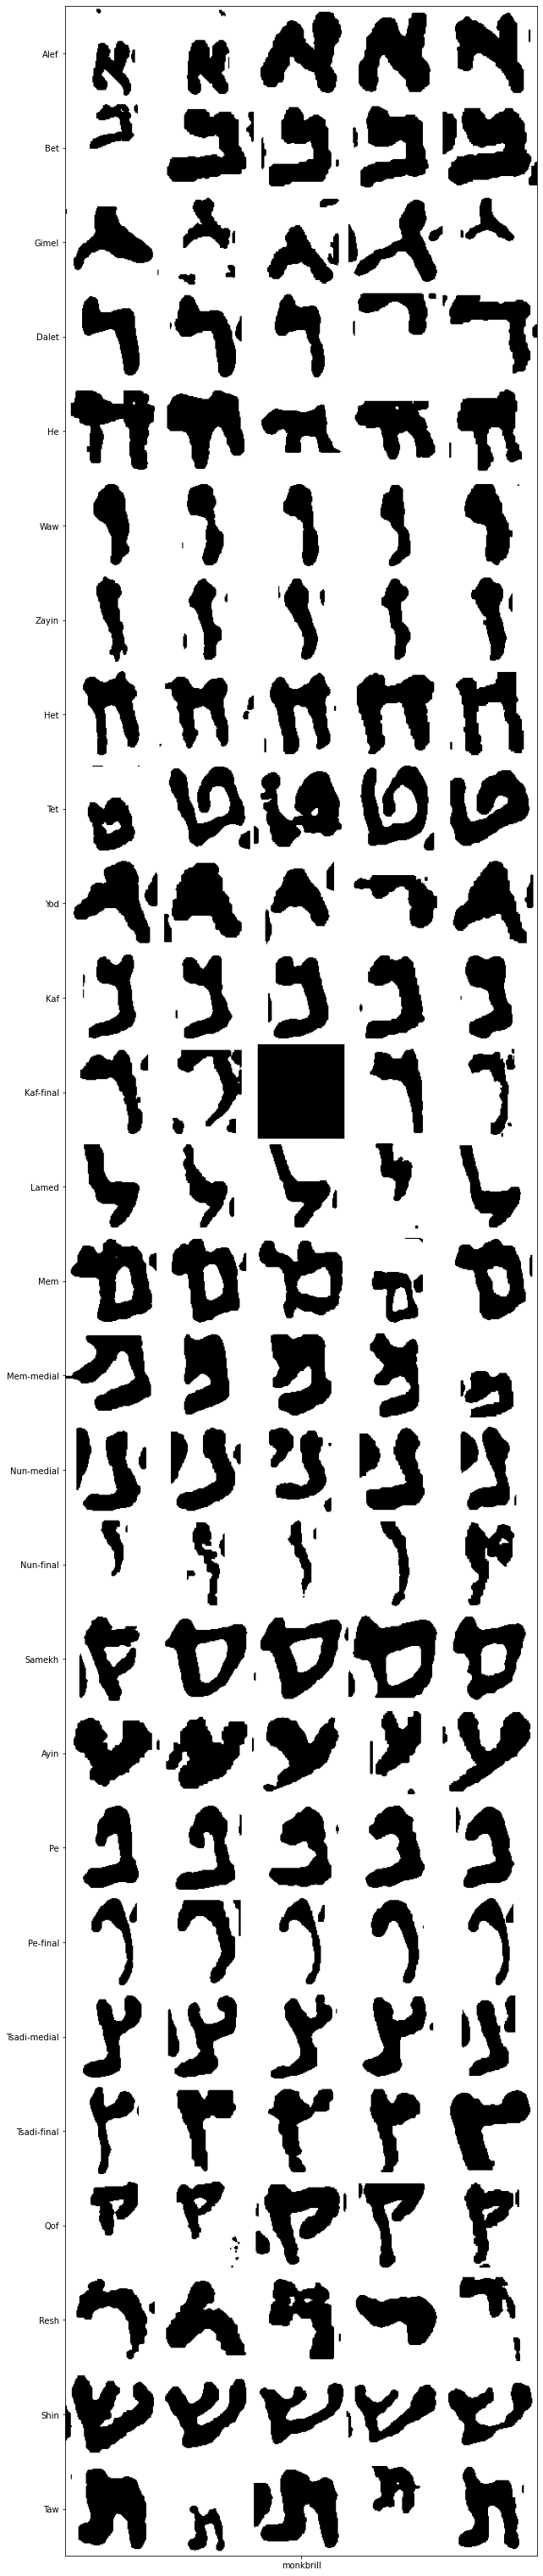

In [122]:
# Add labels to the image using matplotlib
f = plt.figure(figsize = (10, 60))
ax = f.gca()
ax.imshow(sidebyside, cmap='gray', aspect='equal')
ax.set_yticks(np.arange(len(letters)) * size + size / 2)
ax.set_yticklabels(letters)
y_step = size * num 

ax.set_xticks(np.arange(len(styles)) * y_step + y_step / 2)
ax.set_xticklabels(styles)
f.savefig("monkbrill_examples.png")

In [38]:
sample_styles(num, path="../../", styles=["monkbrill", "monkbrill","monkbrill"]).shape

(3, 27, 10)

In [39]:
sample_styles(num).shape

(3, 27, 10)

In [32]:
sample_styles(num, path="../../", styles=["monkbrill", "monkbrill"]).shape

(2, 27, 10)

In [ ]:
sample_styles(num, path="../../styles", styles=["Hasmonean, Hasmo"])